In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from bugless import *
from nltk.tokenize import sent_tokenize
import gudhi
import matplotlib.pyplot as plt

## On data

I chose discoursive essays. Maybe essays with higher grades have more complex structure and thus have more holes in their homology.

In [2]:
pairs = essays("training_set_rel3.tsv")

In [3]:
print(pairs[3])

(4, "In @DATE1's world, there are many things found offensive.  Everyone has their own opinion on what is offensive and what is not. Many parents are becoming upset because they think their children are viewing things that they should not.  Other people are upset because they think the libraries are offending their culture or way of life.  This is even taken to the extreme where people want censhorship on libraries to avoid this, which is wrong.     Some people are becoming concerned about the materials in libraries.  They find these things to be offensive.  Everyone is entitled to their own opinion, but there really is nothing anyone can do if someone is offended.  The world is a public place and everywhere we go, something might be found offensive.  The library is a place for study.  It is never intended to offend someone, or bring bad to the world.  It is simply a place to inform, and if someone is offended by what they see, they should stay away from the library.     I have been to

In [4]:
sent_tokenize(pairs[3][1])

["In @DATE1's world, there are many things found offensive.",
 'Everyone has their own opinion on what is offensive and what is not.',
 'Many parents are becoming upset because they think their children are viewing things that they should not.',
 'Other people are upset because they think the libraries are offending their culture or way of life.',
 'This is even taken to the extreme where people want censhorship on libraries to avoid this, which is wrong.',
 'Some people are becoming concerned about the materials in libraries.',
 'They find these things to be offensive.',
 'Everyone is entitled to their own opinion, but there really is nothing anyone can do if someone is offended.',
 'The world is a public place and everywhere we go, something might be found offensive.',
 'The library is a place for study.',
 'It is never intended to offend someone, or bring bad to the world.',
 'It is simply a place to inform, and if someone is offended by what they see, they should stay away from the

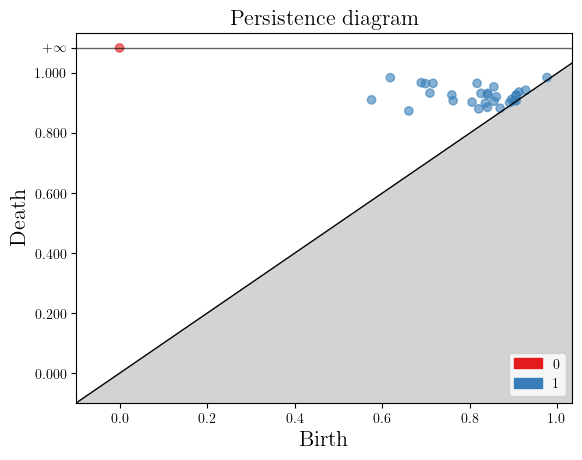

[(1, (0.6185313336814757, 0.9846550758793758)),
 (1, (0.5755927895296349, 0.9108517793892024)),
 (1, (0.6891559566693364, 0.968105540686933)),
 (1, (0.6986457714421133, 0.9650157588952055)),
 (1, (0.7160471584501985, 0.9659144363195398)),
 (1, (0.7089954026201228, 0.9334985308138848)),
 (1, (0.6608224850333209, 0.8739814840239584)),
 (1, (0.759002170605407, 0.9272482423441389)),
 (1, (0.8167570131372475, 0.9659144363195398)),
 (1, (0.762071240803631, 0.9079744135674761)),
 (1, (0.8256547284511431, 0.9324467370656934)),
 (1, (0.8549743156776777, 0.954072907647763)),
 (1, (0.8052957597670691, 0.9030737519080809)),
 (1, (0.8410889694230552, 0.9325392343956157)),
 (1, (0.8406331739984133, 0.9284779257056841)),
 (1, (0.8356325505034383, 0.900102889802326)),
 (1, (0.8606677729573838, 0.92102797200926)),
 (1, (0.8205186007456108, 0.880847822379629)),
 (1, (0.8553057986907713, 0.9061002325431241)),
 (1, (0.8404333875371662, 0.8858773026669198)),
 (1, (0.9126607369813535, 0.9369605714734776)),


In [5]:
essay_homology(pairs[3][1], visual = True)

In [6]:
notes_d1 = []
for i in range(len(pairs)):
    notes_d1.append((pairs[i][0], cnt_barcodes(essay_homology(pairs[i][1]), 1)))

In [7]:
cnt = [0]*13
sm = [0]*13
for p in notes_d1:
  cnt[p[0]] += 1
  sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1)


0 -1
1 0.8333333333333334
2 3.7777777777777777
3 11.857142857142858
4 22.308483290488432
5 34.42666666666667
6 50.857142857142854
7 -1
8 -1
9 -1
10 -1
11 -1
12 -1


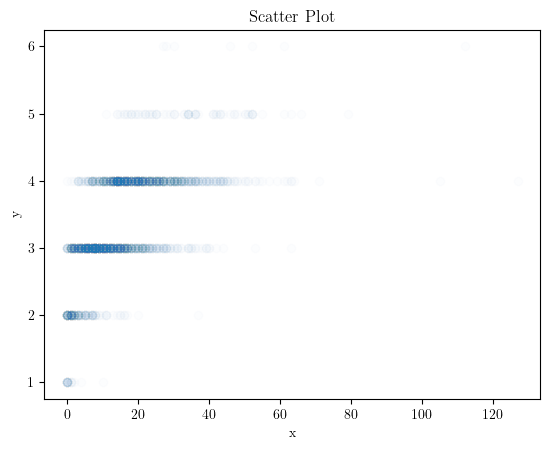

In [8]:
def myshow():
  global notes_d1
  x = [p[1] for p in notes_d1]
  y = [p[0] for p in notes_d1]
  plt.scatter(x, y, alpha=0.01)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Scatter Plot')

  plt.show()
myshow()

## But length gives more holes, let's show that this does not change the conclusion

In [11]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 2800 <= len(pairs[i][1]) <= 3000:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 13.0 1
3 24.11111111111111 9
4 27.136986301369863 73
5 27.555555555555557 9
6 46.0 1
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


## Conclusion

Persistent homology is a good tool to analyse the structure of a dataset in an unsupervised way. Moreover it considers all the scale.